In [11]:
import pandas as pd
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import re
import pickle
import sys
import os


root = {
    "main": r"/content/drive/MyDrive/Proyecto Simulacion Estocastica",
    "stp": r"/I320/i320-",
}

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
sys.path.append(os.path.abspath(root["main"]))

In [32]:
from MCMC_steiner_tree import Annealing, pre_pros, plot_graph_by_edges, Trans, weight, Annealing, read_stp

### Cargar grafo test

In [14]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQjROgzpVbCUbaAkgxR-15HlCPGmy6WxjyDAjzw4_V-4qFyXIA17-sRp5rHdkivgSJeCufzWEC60O97/pub?output=xlsx"
df_G0 = pd.read_excel(url)
df_G0 = df_G0.set_index("NODE")
df_G0

NB
NODE                                     
A                              ['1', '2']
B                                   ['2']
C                                   ['3']
D                               ['3','4']
E                                   ['5']
F                                   ['6']
G                                  ['10']
H                                   ['9']
1                         ['3', '2', 'A']
2                    ['3', '1', 'A', 'B']
3     ['2', '1', 'C', 'D', '4', '8', '9']
4                    ['5', '7', '3', 'D']
5                         ['E', '6', '4']
6                         ['F', '5', '7']
7                   ['10', '8', '4', '6']
8                         ['7', '9', '3']
9                   ['H', '10', '3', '8']
10                        ['G', '9', '7']

In [15]:
col_source = []
col_target = []
col_weight = []
added = []
for node in df_G0.index:
  node = str(node)
  NB = eval(df_G0.loc[node]["NB"])
  for n in NB:
    n = str(n)
    if {node, n} not in added:
      col_source.append(node)
      col_target.append(n)
      col_weight.append(np.random.randint(1, 10))
      added.append({node, n})

df_edges_G = pd.DataFrame({
    "SOURCE": col_source,
    "TARGET": col_target, 
    "WEIGHT": col_weight
})
terminals = "A B C D E F G H".split()
print("Terminals:", *terminals)
df_edges_G

Terminals: A B C D E F G H


SOURCE TARGET  WEIGHT
0       A      1       3
1       A      2       1
2       B      2       2
3       C      3       9
4       D      3       6
5       D      4       4
6       E      5       3
7       F      6       3
8       G     10       3
9       H      9       2
10      1      3       4
11      1      2       6
12      2      3       1
13      3      4       4
14      3      8       8
15      3      9       6
16      4      5       7
17      4      7       2
18      5      6       6
19      6      7       6
20      7     10       6
21      7      8       1
22      8      9       1
23      9     10       7

In [17]:
df_G, dic_incidence, dic_edges, G = pre_pros(df_edges_G)

In [18]:
for ix in df_G.index:
  l1 = eval(df_G0.loc[ix]["NB"])
  l2 = df_G.loc[ix]["NB"]
  print(set(l1) == set(l2))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [20]:
x = [
     ['1', 'A'],
     ['1', '3'],
     ['3', 'C'],
     ['3', '8'],
     ['3', 'D'],
     ['3', '4'],
     ['4', '5'],
     ['5', 'E'],
     ['5', '6'],
     ['6', 'F'],
     ['9', 'H'],
     ['10', 'G'],
     ['2', 'A'],
     ['2', 'B'],
     ['8', '9'],
     ['10', '9']
     ]
x = [sorted(u) for u in x]

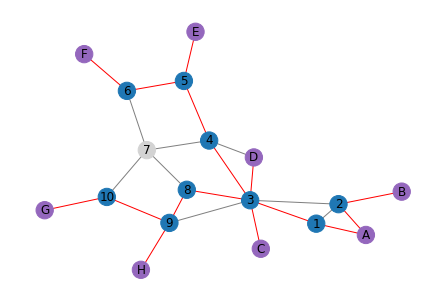

In [24]:
plot_graph_by_edges(x, G, terminals)

In [26]:
y = Trans(0, x, df_G, dic_edges, terminals, greedy=True)
y

[['2', 'A'],
 ['8', '9'],
 ['9', 'H'],
 ['2', 'B'],
 ['5', 'E'],
 ['6', 'F'],
 ['10', 'G'],
 ['1', '3'],
 ['3', '4'],
 ['3', 'D'],
 ['5', '6'],
 ['1', '2'],
 ['4', '5'],
 ['10', '9'],
 ['3', '8'],
 ['3', 'C']]

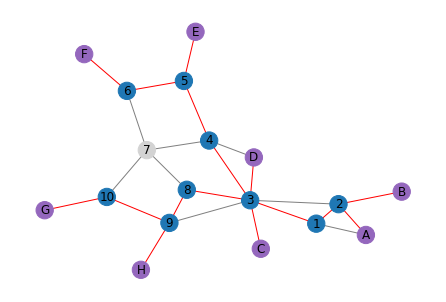

In [27]:
plot_graph_by_edges(y, G, terminals) #?

In [29]:
y = Trans(0, y, df_G, dic_edges, terminals, greedy=False)
weight(y, dic_edges)

74

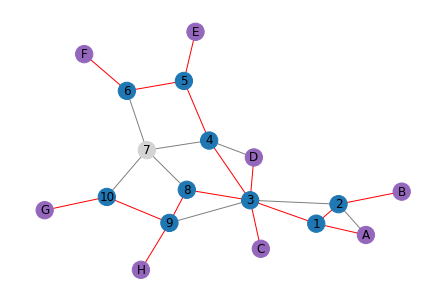

In [30]:
plot_graph_by_edges(y, G, terminals)

In [36]:
df_edges_G, terminals = read_stp(root["main"]+'/I320/i320-001.stp')
df_G, dic_incidence, dic_edges, G = pre_pros(df_edges_G)
print("Terminals:", *terminals)
df_edges_G.head()

Terminals: 1 2 3 4 5 6 7 8


SOURCE  TARGET  WEIGHT
0       1      20     197
1       1      28     206
2       1      53     204
3       1      61     200
4       1     201     194

In [37]:
save_rate = 10
nf = 1000

def beta(n):
  return (1/100)*(n**(1/10))

annealing = Annealing(nf=nf, beta=beta, df_NB_G=df_G, dic_weight_edges=dic_edges, terminals=terminals, greedy=True)
U = np.random.uniform(size=nf)
V = np.random.uniform(size=nf)
annealing.MCMC(U, V, save_rate=save_rate)

G óptimo

2672
[[46, 306],
 [57, 184],
 [57, 163],
 [31, 265],
 [20, 184],
 [20, 158],
 [31, 64],
 [46, 64],
 [1, 265],
 [2, 184],
 [3, 158],
 [1, 20],
 [6, 306],
 [5, 163],
 [4, 163],
 [8, 31],
 [6, 7]]


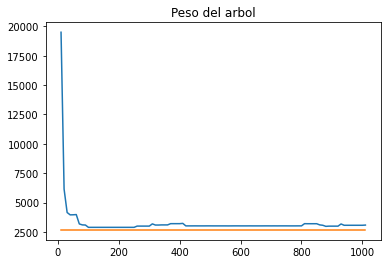

In [738]:
G_optimo = {'peso_optimo':2672, 
            'steiner':[[46, 306], [57, 184], [57, 163], [31, 265], [20, 184], [20, 158], [31, 64], [46, 64], [1, 265], [2, 184], [3, 158], [1, 20], [6, 306], [5, 163], [4, 163], [8, 31], [6, 7]]}

plt.plot([i*save_rate for i in range(1, len(annealing.CM))],[weight(x, dic_edges) for x in annealing.CM[1:]])
plt.plot([i*save_rate for i in range(1, len(annealing.CM))],[G_optimo['peso_optimo'] for x in annealing.CM[1:]])
plt.title('Peso del arbol');

In [739]:
weight(annealing.X, dic_edges) #i320-001	320 	480 	8 	Ps 	-> OPT: 2672  http://steinlib.zib.de/showset.php?I320

3084

ValueError: ignored

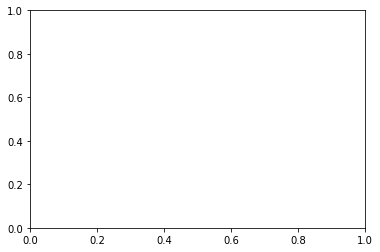

In [622]:
largo = len(G_optimo['steiner'])

plt.plot([i*save_rate for i in range(int(nf/save_rate)+1)],[len(x) for x in annealing.CM])
plt.plot([i*save_rate for i in range(len(annealing.CM))],[largo for x in annealing.CM])
plt.title('Largo del grafo');

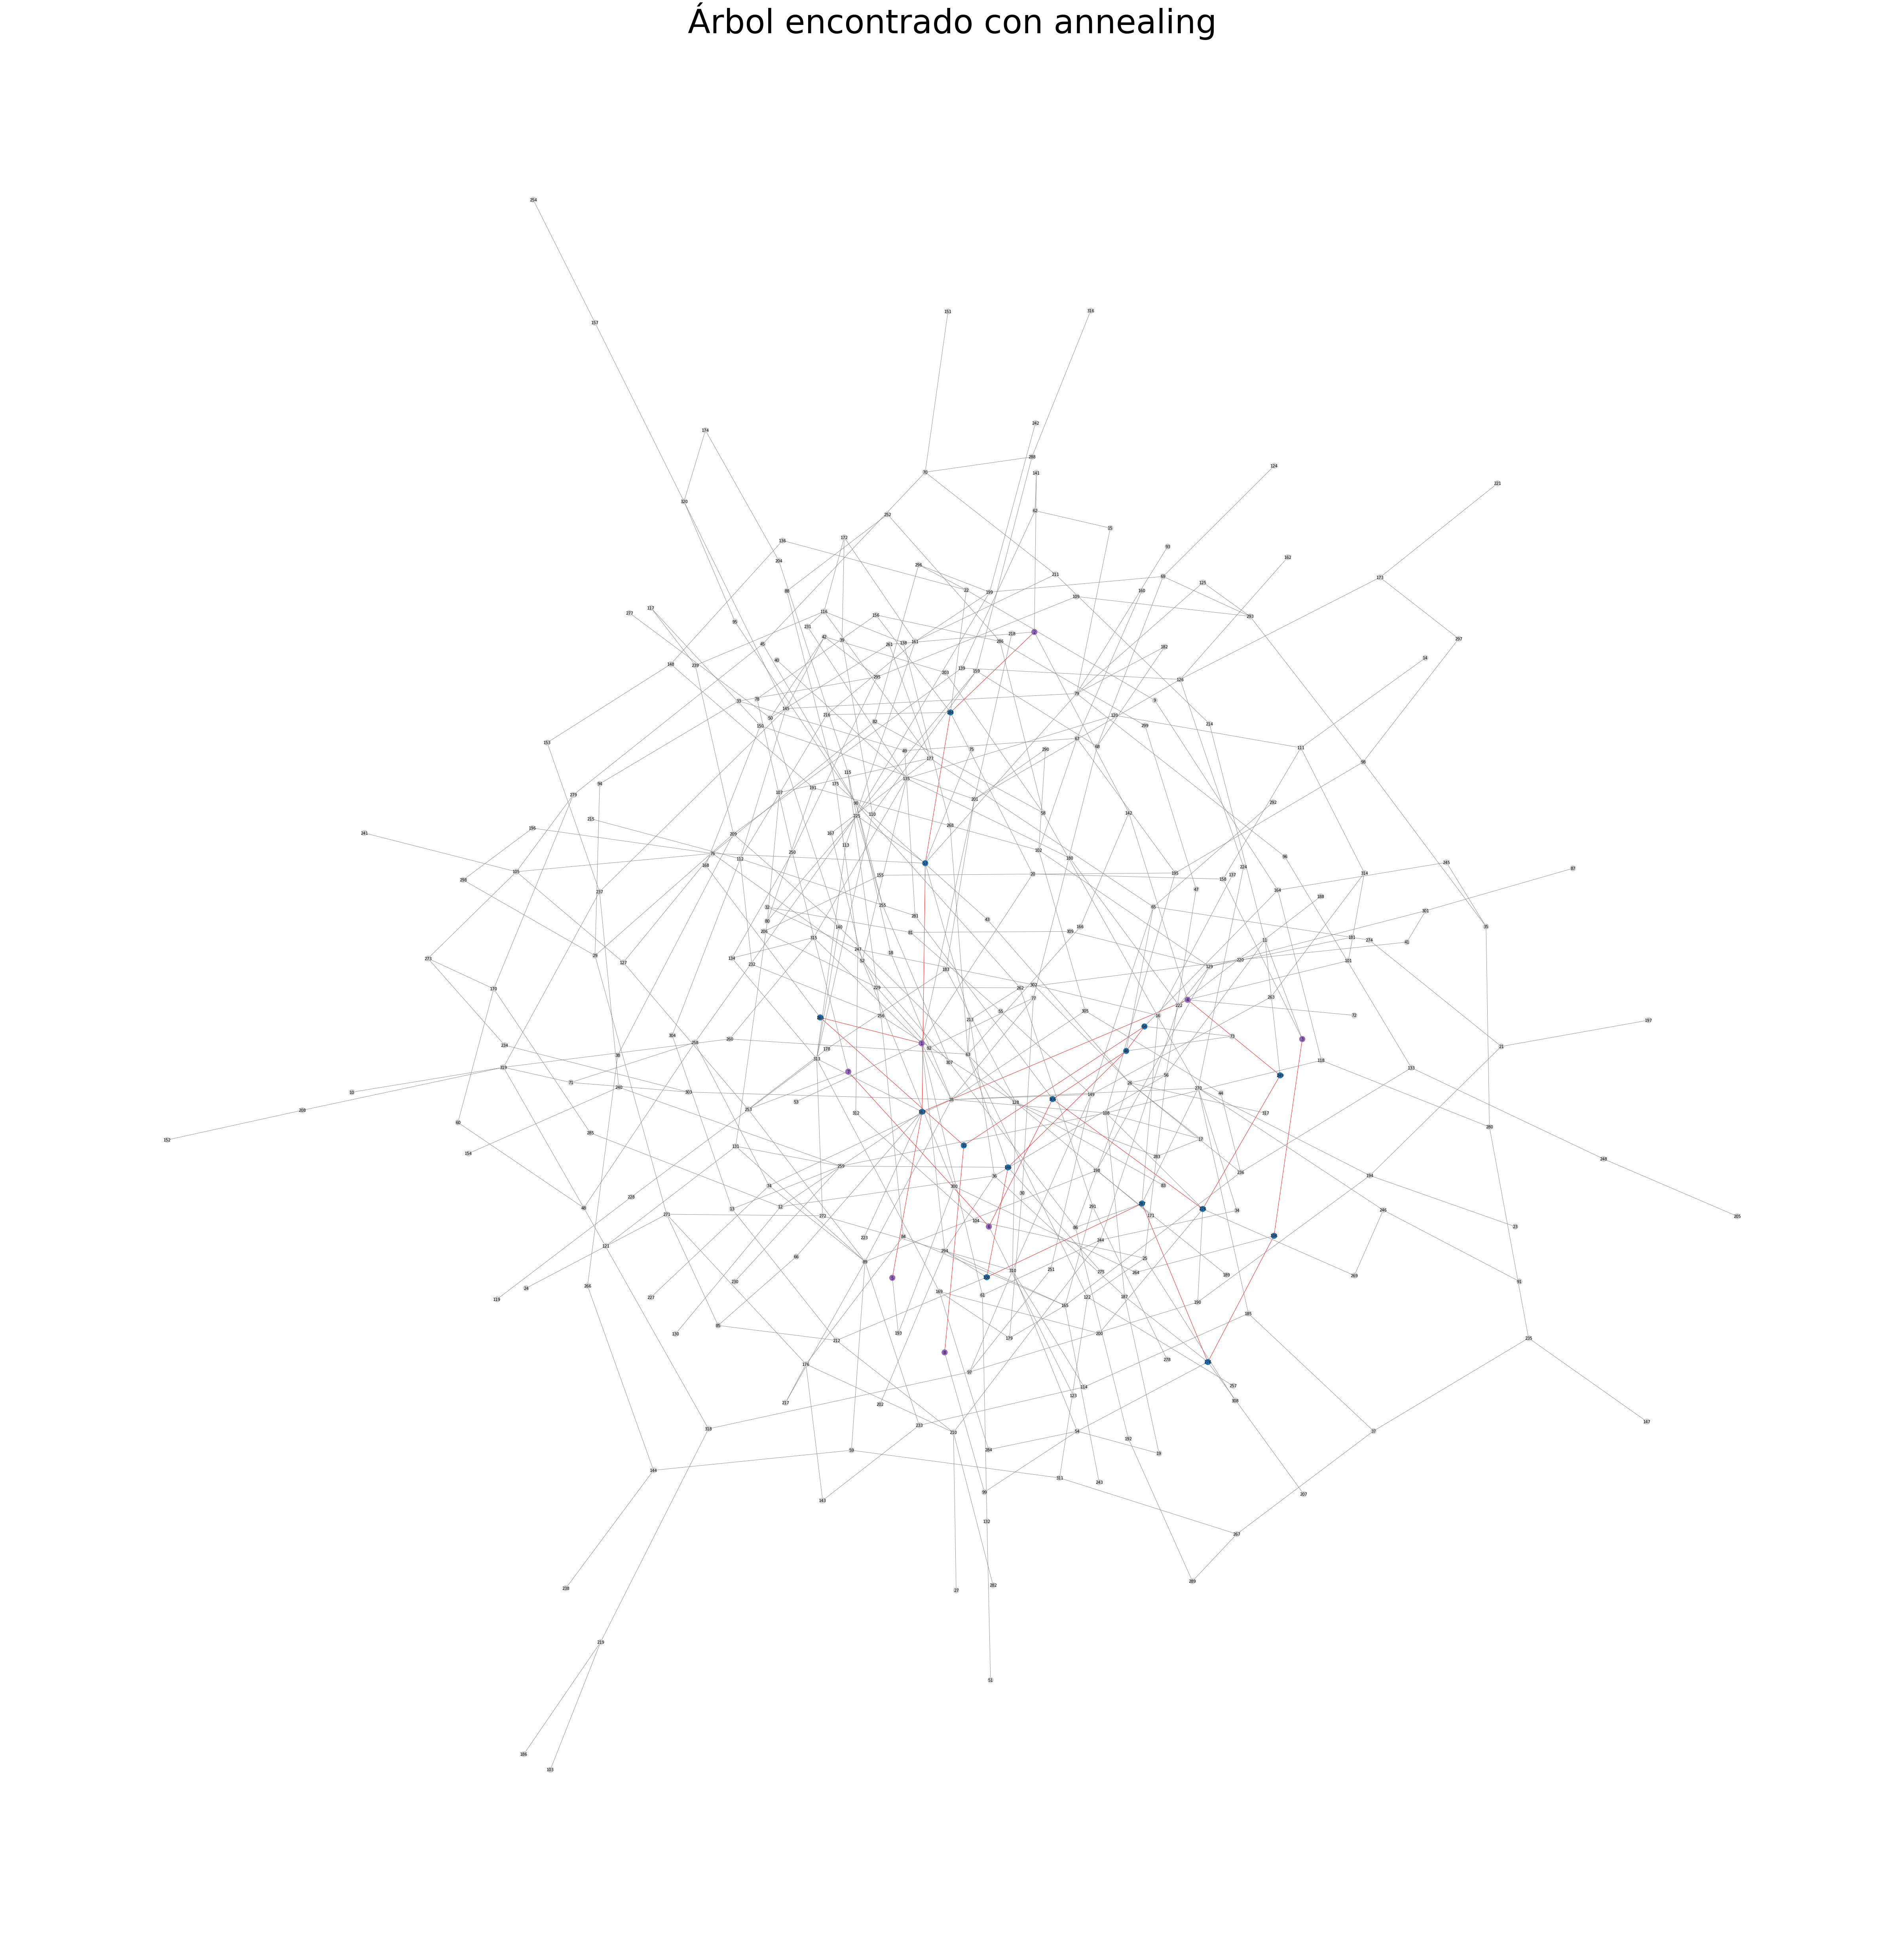

In [ ]:
fig = plt.figure(1, figsize=(80, 80), dpi=60)
plot_graph_by_edges(annealing.X, G, terminals)
plt.title('Árbol encontrado con annealing',fontsize=100);

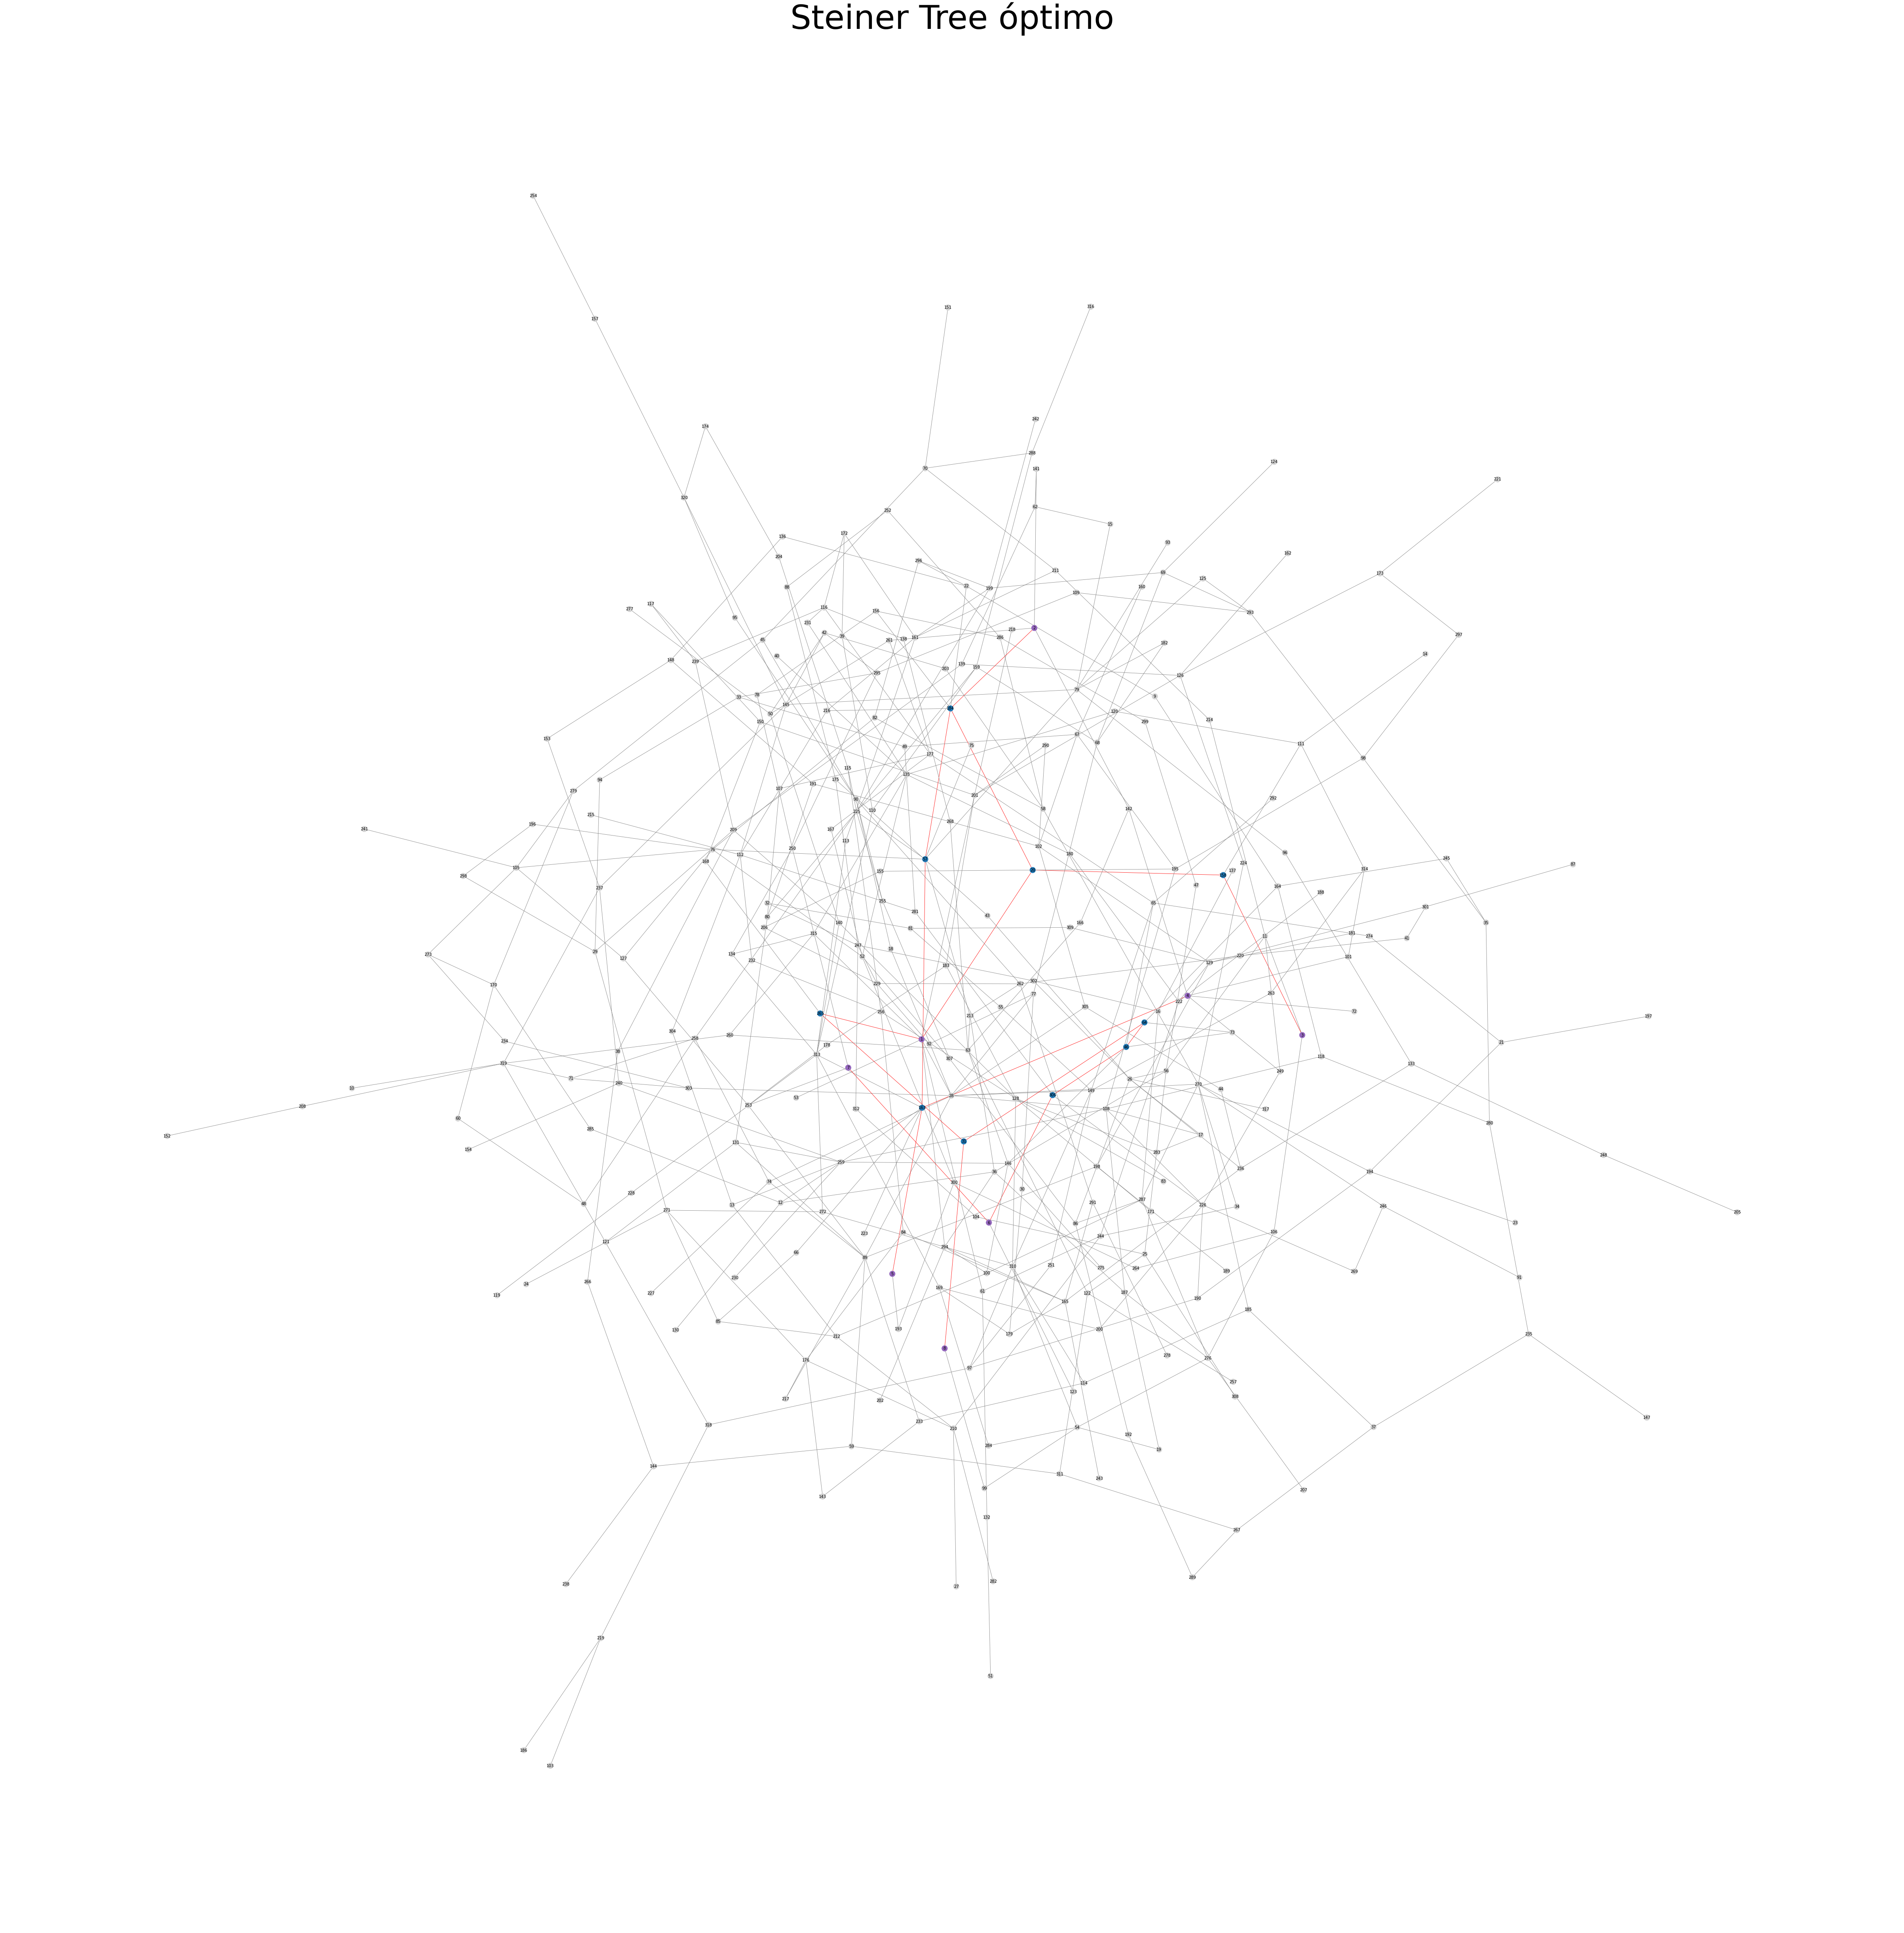

In [ ]:
fig = plt.figure(1, figsize=(80, 80), dpi=60)
plot_graph_by_edges(G_optimo['steiner'], G, terminals)
plt.title('Steiner Tree óptimo',fontsize=100);

**Leyendo el resto de los grafos**

In [ ]:
save_rate = 10
nf = 10000

def beta(n):
  return n**(1/8)

]0, 1] U [1, 10[

In [ ]:
|val_X_1-val_opt| |val_X_2-val_opt| ... |val_X_N-val_opt|
|val_X_1-val_opt| |val_X_2-val_opt| ... |val_X_N-val_opt|
...
|val_X_1-val_opt| |val_X_2-val_opt| ... |val_X_N-val_opt|

In [ ]:
files = [f for f in listdir(roots["main"]+'/I320') if isfile(join(roots["main"]+'/I320', f))]

results = {}

for file in files:
  df_edges_G, terminals = leer_grafo_stp(file)
  df_G, dic_incidence, dic_edges, G = pre_pros(df_edges_G)

  annealing = Annealing(nf=nf, beta=beta, df_NB_G=df_G, dic_weight_edges=dic_edges, terminals=terminals)
  U = np.random.uniform(size=nf)
  annealing.MCMC(U, save_rate=save_rate)

  results[file] = annealing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


In [ ]:
file = roots["main"]+'/Testset_I320.xlsx'
df_opt = pd.read_excel(file)
df_opt = df_opt.set_index("Name")
df_opt.head()

|V|  |E|  |T| DC time   Opt
Name                                 
i320-001  320  480    8  P    s  2672
i320-002  320  480    8  P    s  2847
i320-003  320  480    8  P    s  2972
i320-004  320  480    8  P    s  2905
i320-005  320  480    8  P    s  2991

In [ ]:
pesos = {}

for file in results.keys():
  df_edges_G, _ = leer_grafo_stp(file)
  _, _, dic_edges, _ = pre_pros(df_edges_G)
  file_name = file.replace('.stp','')
  opt = df_opt['Opt'][file_name]
  encontrado = weight(results[file].X, dic_edges)
  print(file+', encontrado: {}, optimo: {}, largo: {}'.format(encontrado,opt,df_opt['|E|'][file_name]))

  pesos[file_name] = {'encontrado':encontrado, 'optimo':opt}

i320-005.stp, encontrado: 4014, optimo: 2991, largo: 480
i320-001.stp, encontrado: 2795, optimo: 2672, largo: 480
i320-003.stp, encontrado: 3519, optimo: 2972, largo: 480
i320-004.stp, encontrado: 3018, optimo: 2905, largo: 480
i320-002.stp, encontrado: 2941, optimo: 2847, largo: 480
i320-014.stp, encontrado: 3232, optimo: 2061, largo: 1845
i320-013.stp, encontrado: 2824, optimo: 2072, largo: 1845
i320-015.stp, encontrado: 3596, optimo: 2059, largo: 1845
i320-012.stp, encontrado: 2996, optimo: 1997, largo: 1845
i320-011.stp, encontrado: 2359, optimo: 2053, largo: 1845
i320-021.stp, encontrado: 3920, optimo: 1553, largo: 51040
i320-022.stp, encontrado: 3215, optimo: 1565, largo: 51040
i320-023.stp, encontrado: 3411, optimo: 1549, largo: 51040
i320-024.stp, encontrado: 3855, optimo: 1553, largo: 51040
i320-025.stp, encontrado: 3209, optimo: 1550, largo: 51040
i320-031.stp, encontrado: 3587, optimo: 2673, largo: 640
i320-032.stp, encontrado: 3901, optimo: 2770, largo: 640
i320-033.stp, en

In [ ]:
def dic_annealing(ann_obj):
  dic = {}
  dic['X'] = ann_obj.X
  dic['CM'] = ann_obj.CM
  dic['V'] = ann_obj.V 
  dic['dic_weight_edges'] = ann_obj.dic_weight_edges
  dic['terminals'] = ann_obj.terminals
  return dic

In [ ]:
results_save = {}
for file in results.keys():
  results_save[file] = dic_annealing(results[file])

import pickle

file_name = 'results_nf={}_beta=nexp(0.125)_sr={}.pickle'.format(nf,save_rate)

with open(file_name, 'wb') as handle:
    pickle.dump(results_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def plot_peso(file):
  df_edges_G, _ = leer_grafo_stp(file)
  _, _, dic_edges, _ = pre_pros(df_edges_G)
  file_name = file.replace('.stp','')
  opt = df_opt['Opt'][file_name]
  # print(file+', encontrado: {}, optimo: {}, largo: {}'.format(weight(results[file].X, dic_edges),opt,df_opt['|E|'][file_name]))

  ann = results[file]

  plt.plot([i*save_rate for i in range(len(ann.CM))],[weight(x, dic_edges) for x in ann.CM])
  plt.plot([i*save_rate for i in range(len(ann.CM))],[G_optimo['peso_optimo'] for x in ann.CM])
  plt.title('Peso del arbol {}, largo {}, dificultad {} ({})'.format(file_name,df_opt['|E|'][file_name],df_opt['DC'][file_name],df_opt['time'][file_name]));

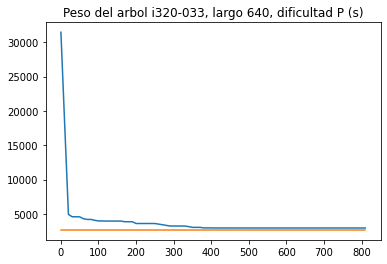

In [ ]:
plot_peso('i320-033.stp')

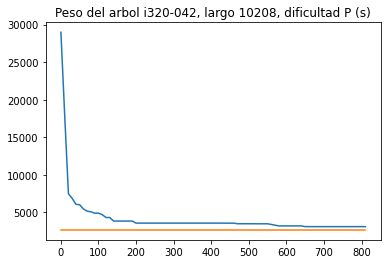

In [ ]:
plot_peso('i320-042.stp')

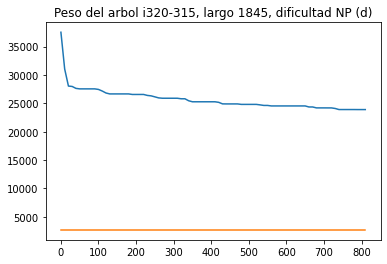

In [ ]:
plot_peso('i320-315.stp')

Text(0.5, 1.0, 'Error vs largo del grafo')

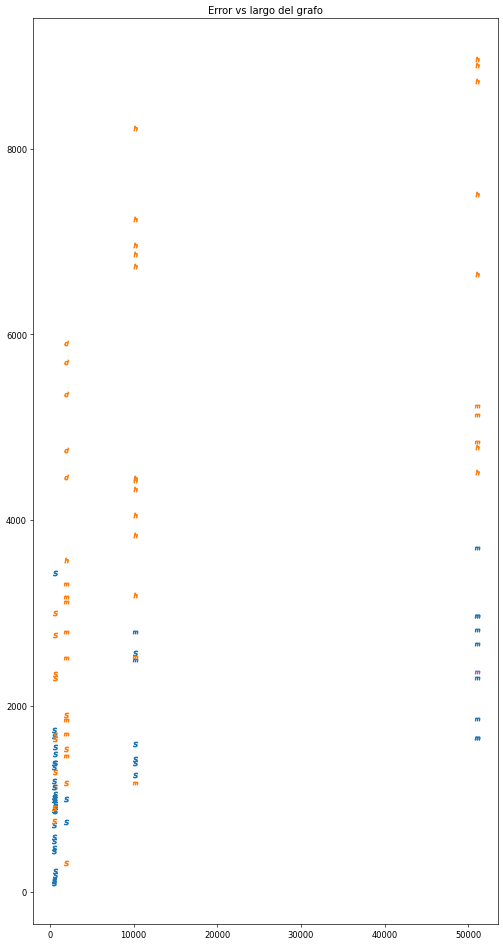

In [ ]:
fig = plt.figure(1, figsize=(10, 20), dpi=60)
for file in results.keys():
  #df_edges_G, _ = leer_grafo_stp(file)
  #_, _, dic_edges, _ = pre_pros(df_edges_G)
  file_name = file.replace('.stp','')

  largo = df_opt['|E|'][file_name]
  diff = df_opt['DC'][file_name]
  time = df_opt['time'][file_name]
  # print(file+', encontrado: {}, optimo: {}, largo: {}'.format(encontrado,opt,largo))

  error = pesos[file_name]['encontrado'] - pesos[file_name]['optimo']

  c = 'tab:blue' if diff=='P' else 'tab:orange'
  c = 'tab:purple' if diff=='L' else c
  m = '${}$'.format(time)

  plt.plot(largo,error,color=c,marker=m)

plt.title('Error vs largo del grafo')

In [ ]:
file_name = 'errors_nf={}_beta=nexp(0.125).pickle'.format(nf)

with open(file_name, 'wb') as handle:
    pickle.dump(error, handle, protocol=pickle.HIGHEST_PROTOCOL)

files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>